In [110]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib
from bs4 import BeautifulSoup
import requests
import glob

In [131]:
# 파일 경로 설정
file_path = '../data/processed/forecast_merged.csv'
forecast_df = pd.read_csv(file_path, encoding='euc-kr')

#일시 데이트타임 적용
forecast_df['일시'] = pd.to_datetime(forecast_df['일시'])
forecast_df['연도'] = forecast_df['일시'].dt.year
forecast_df['월'] = forecast_df['일시'].dt.month
forecast_df['일'] = forecast_df['일시'].dt.day
forecast_df['시간'] = forecast_df['일시'].dt.hour
forecast_df['요일'] = forecast_df['일시'].dt.day_name().str[:3]

# 결측치 제거
forecast_df.fillna(0, inplace=True)

#데이터 타입 숫자인지 확인????
numeric_columns = forecast_df.select_dtypes(include=['float64', 'int64']).columns
forecast_df[numeric_columns] = forecast_df[numeric_columns].apply(pd.to_numeric, errors='coerce')


# 결과 확인
forecast_df.head(-5)

,지점,일시,풍속(m/s),풍향(deg),GUST풍속(m/s),현지기압(hPa),습도(%),기온(°C),수온(°C),최대파고(m),유의파고(m),평균파고(m),파주기(sec),파향(deg),연도,월,일,시간,요일
0,22105,2020-01-01 00:00:00,6.4,284.0,9.3,1027.5,48.0,3.2,14.8,3.5,2.0,1.4,8.0,41.0,2020,1,1,0,Wed
1,22105,2020-01-01 01:00:00,6.6,309.0,9.6,1026.7,44.0,3.0,14.8,3.7,1.9,1.4,8.0,45.0,2020,1,1,1,Wed
2,22105,2020-01-01 02:00:00,7.3,292.0,10.7,1026.6,50.0,3.4,14.8,3.4,2.2,1.6,8.0,43.0,2020,1,1,2,Wed
3,22105,2020-01-01 03:00:00,7.7,294.0,11.1,1026.6,47.0,2.8,14.8,3.2,1.9,1.3,5.8,22.0,2020,1,1,3,Wed
4,22105,2020-01-01 04:00:00,7.4,292.0,10.5,1025.9,54.0,3.1,14.8,3.1,2.0,1.4,8.0,45.0,2020,1,1,4,Wed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336095,22302,2025-01-12 14:00:00,12.8,308.0,15.6,1016.1,71.0,5.0,13.5,4.3,2.3,1.5,7.7,357.0,2025,1,12,14,Sun
336096,22302,2025-01-12 15:00:00,12.7,306.0,16.8,1016.2,70.0,5.3,13.5,3.6,2.2,1.5,6.5,335.0,2025,1,12,15,Sun
336097,22302,2025-01-12 16:00:00,13.9,310.0,16.5,1016.4,71.0,5.4,13.5,3.9,2.4,1.6,7.4,343.0,2025,1,12,16,Sun
336098,22302,2025-01-12 17:00:00,13.3,300.0,16.5,1016.6,70.0,5.6,13.4,4.5,2.6,1.6,8.0,341.0,2025,1,12,17,Sun


In [ ]:
# 실시간 추가(셀레니움?) -- 강사님께 제지당함

# url = 'https://data.kma.go.kr/data/sea/selectBuoyRltmList.do?pgmNo=52'

# # 2️⃣ HTTP 요청을 보내서 웹 페이지 가져오기
# response = requests.get(url)

# # 3️⃣ BeautifulSoup을 사용해 HTML 파싱
# soup = BeautifulSoup(response.text, 'html.parser')

# # 4️⃣ 원하는 데이터 추출 (예: 모든 제목 태그 <h1>)
# titles = soup.find_all('h1')

# # 5️⃣ 추출한 데이터를 출력
# for title in titles:
#     print(title.get_text())

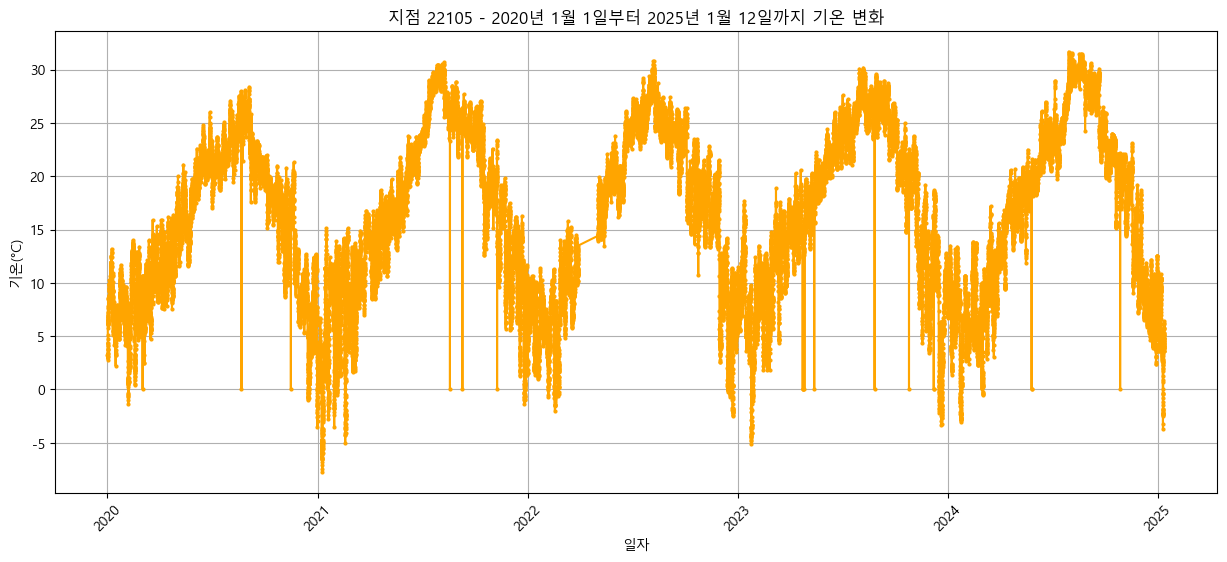

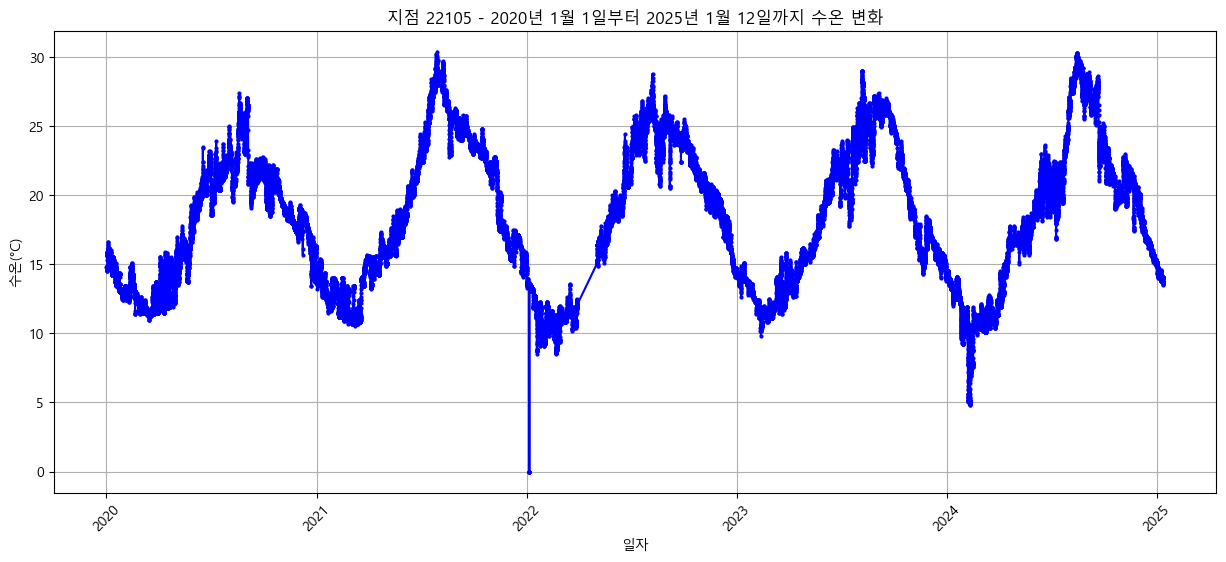

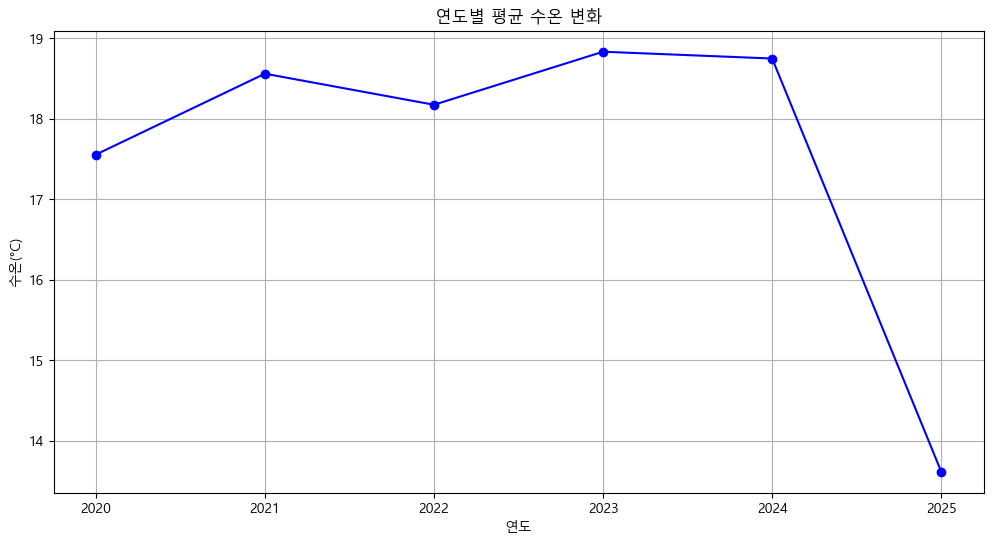

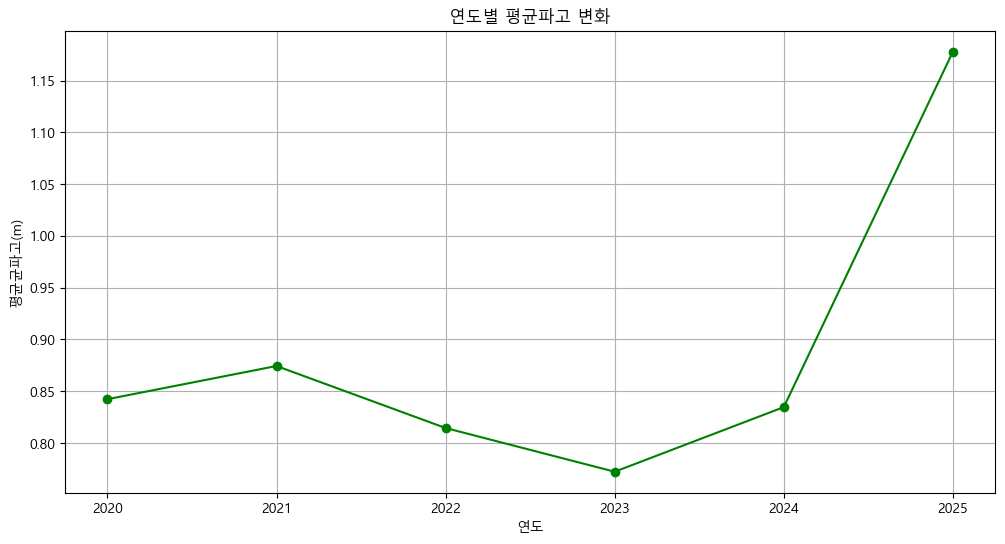

In [127]:
# 1️⃣ 지점 22105 데이터 필터링 (2020년 1월 1일부터 2025년 1월 12일까지)
filtered_df = forecast_df[(forecast_df['지점'] == 22105) & (forecast_df['일시'] >= '2020-01-01') & (forecast_df['일시'] <= '2025-01-12')]

# 2️⃣ '일시'를 인덱스로 설정
filtered_df.set_index('일시', inplace=True)

# 3️⃣ 기온 변화 시각화
plt.figure(figsize=(15, 6))
plt.plot(filtered_df.index, filtered_df['기온(°C)'], color='orange', linestyle='-', marker='o', markersize=2)
plt.title('지점 22105 - 2020년 1월 1일부터 2025년 1월 12일까지 기온 변화')
plt.xlabel('일자')
plt.ylabel('기온(°C)')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

# 4️⃣ 수온 변화 시각화
plt.figure(figsize=(15, 6))
plt.plot(filtered_df.index, filtered_df['수온(°C)'], color='blue', linestyle='-', marker='o', markersize=2)
plt.title('지점 22105 - 2020년 1월 1일부터 2025년 1월 12일까지 수온 변화')
plt.xlabel('일자')
plt.ylabel('수온(°C)')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


plt.figure(figsize=(12, 6))
yearly_temp = forecast_df.groupby('연도')['수온(°C)'].mean()
plt.plot(yearly_temp.index, yearly_temp.values, marker='o', color='blue')
plt.title('연도별 평균 수온 변화')
plt.xlabel('연도')
plt.ylabel('수온(°C)')
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
hourly_wave = forecast_df.groupby('연도')['평균파고(m)'].mean()
plt.plot(hourly_wave.index, hourly_wave.values, marker='o', color='green')
plt.title('연도별 평균파고 변화')
plt.xlabel('연도')
plt.ylabel('평균균파고(m)')
plt.grid(True)
plt.show()